# Survival Analysis 
The fundamental concept in survival analysis is the survival curve, S(t), which is a function that maps from a duration, t, to the probability of surviving longer than t.

In [1]:
# %pip install lifelines

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
from lifelines.datasets import load_lung
data = load_lung()

In [4]:
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
# days -> year
data['time'] /= 365.25

In [6]:
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,0.837782,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,1.245722,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,2.765229,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,0.574949,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,2.417522,1,60,1,0.0,100.0,90.0,NaN,0.0


**Kaplan-Meier estimation:** The general idea is that we can use the data to estimate the hazard function, then convert the hazard function to a survival curve.

Text(0, 0.5, 'Survival Probability')

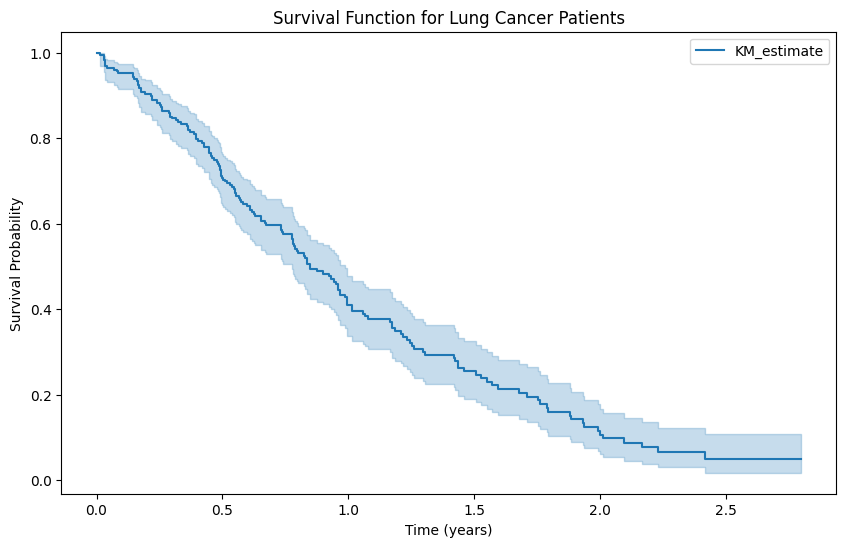

In [7]:
# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['time'], event_observed=data['status'])

# Plot the results
plt.figure(figsize=(10,6))
kmf.plot()
plt.title('Survival Function for Lung Cancer Patients')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')